# Profile & Project Details


1.   Name: Iva Raudyatuzzahra
2.   Email: ivaraudya@gmail.com
3. Project: Flowers Recognition Model Deployment
4. Dataset: https://www.kaggle.com/alxmamaev/flowers-recognition

# Data Preparation & Preprocessing

File Extracting



In [2]:
import zipfile

local_zip = '/content/drive/MyDrive/Datasets/flowers.zip'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/content/')
zip_extract.close()

Directory Checking

In [3]:
import os

basic_file = ('/content/flowers/flowers')
os.listdir(basic_file)

['tulip', 'rose', 'sunflower', 'daisy', 'dandelion']

In [4]:
folder_daisy = os.path.join('/content/flowers/flowers/daisy')
folder_dandelion = os.path.join('/content/flowers/flowers/dandelion')
folder_rose = os.path.join('/content/flowers/flowers/rose')
folder_sunflower = os.path.join('/content/flowers/flowers/sunflower')
folder_tulip = os.path.join('/content/flowers/flowers/tulip')

print('daisy folder contains', len(os.listdir(folder_daisy)), 'images')
print('dandelion folder contains', len(os.listdir(folder_dandelion)), 'images')
print('rose folder contains', len(os.listdir(folder_rose)), 'images')
print('sunflower folder contains', len(os.listdir(folder_sunflower)), 'images')
print('tulip folder contains', len(os.listdir(folder_tulip)), 'images')


daisy folder contains 769 images
dandelion folder contains 1055 images
rose folder contains 784 images
sunflower folder contains 734 images
tulip folder contains 984 images


Images Preview

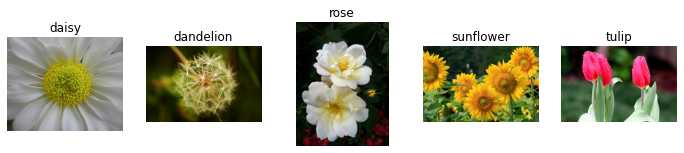

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread('/content/flowers/flowers/daisy/100080576_f52e8ee070_n.jpg')
plt.title('daisy')
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread('/content/flowers/flowers/dandelion/10043234166_e6dd915111_n.jpg')
plt.title('dandelion')
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread('/content/flowers/flowers/rose/10090824183_d02c613f10_m.jpg')
plt.title('rose')
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread('/content/flowers/flowers/sunflower/1008566138_6927679c8a.jpg')
plt.title('sunflower')
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread('/content/flowers/flowers/tulip/100930342_92e8746431_n.jpg')
plt.title('tulip')
plt.imshow(img)

# Image Augmentation & Split Data

In [51]:
import tensorflow as tf
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  basic_file,
  validation_split = 0.2,
  subset = 'training',
  seed=42,
  image_size=(180, 180),
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  basic_file,
  validation_split=0.2,
  subset="validation",
  seed=41,
  image_size=(180, 180),
  batch_size=32)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.
Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Building & Evaluation

Define Model Architecture

In [53]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [54]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 45, 45, 64)       

Add Optimizer & Loss Function

In [56]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

Add Callback

In [57]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                 factor=0.2,
                                                 patience=4,
                                                 min_lr=0.0001)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

Training The Model

In [59]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    callbacks = [reduce_lr, early_stop]
)

Epoch 1/100
109/109 [==============================] - 20s 76ms/step - loss: 1.2802 - accuracy: 0.4417 - val_loss: 1.3136 - val_accuracy: 0.4745
Epoch 2/100
109/109 [==============================] - 5s 48ms/step - loss: 1.0469 - accuracy: 0.5799 - val_loss: 0.9600 - val_accuracy: 0.6053
Epoch 3/100
109/109 [==============================] - 5s 47ms/step - loss: 0.9526 - accuracy: 0.6273 - val_loss: 0.9398 - val_accuracy: 0.6181
Epoch 4/100
109/109 [==============================] - 5s 47ms/step - loss: 0.8834 - accuracy: 0.6470 - val_loss: 0.9168 - val_accuracy: 0.6481
Epoch 5/100
109/109 [==============================] - 5s 47ms/step - loss: 0.8661 - accuracy: 0.6644 - val_loss: 0.8415 - val_accuracy: 0.6736
Epoch 6/100
109/109 [==============================] - 5s 47ms/step - loss: 0.8116 - accuracy: 0.6829 - val_loss: 0.8248 - val_accuracy: 0.6713
Epoch 7/100
109/109 [==============================] - 5s 47ms/step - loss: 0.7588 - accuracy: 0.7048 - val_loss: 0.9727 - val_accuracy

Plot Loss & Accuracy

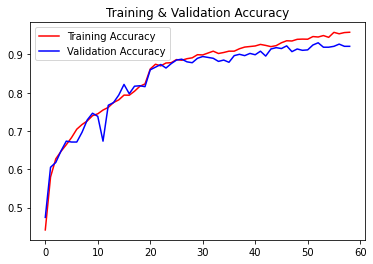

<Figure size 432x288 with 0 Axes>

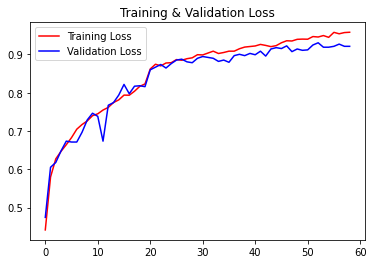

<Figure size 432x288 with 0 Axes>

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, acc, 'r', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend(loc=2)
plt.figure()
plt.show()

# Deployment

Convert Model

In [61]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpcv62nizw/assets


Saving Model

In [62]:
open('flowers.tflite', 'wb').write(tfmodel)

15961112